In [22]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [2]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['wine_data.csv']))

Saving wine_data.csv to wine_data.csv


In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#first few rows of dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#descriptive statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#to get basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#to find the datatype of each column
df.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [9]:
#finding the missing values in the columns
df.isna().sum()
#replacing missing values with median value of the column
df['fixed acidity'].fillna(df['fixed acidity'].median(),inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].median(),inplace=True)
df['citric acid'].fillna(df['citric acid'].median(),inplace=True)
df['residual sugar'].fillna(df['residual sugar'].median(),inplace=True)
df['chlorides'].fillna(df['chlorides'].median(),inplace=True)
df['free sulfur dioxide'].fillna(df['free sulfur dioxide'].median(),inplace=True)
df['total sulfur dioxide'].fillna(df['total sulfur dioxide'].median(),inplace=True)
df['density'].fillna(df['density'].median(),inplace=True)
df['pH'].fillna(df['pH'].median(),inplace=True)
df['sulphates'].fillna(df['sulphates'].median(),inplace=True)
df['alcohol'].fillna(df['alcohol'].median(),inplace=True)
df['quality'].fillna(df['quality'].median(),inplace=True)

<ipython-input-9-181ab521a8dc>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fixed acidity'].fillna(df['fixed acidity'].median(),inplace=True)
<ipython-input-9-181ab521a8dc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
# 1. most frequently occurring wine quality
# highest number and lowest number in the quality column

most_frequent= df['quality'].mode()[0]
max = df['quality'].max()
min = df['quality'].min()

print(" Most frequently occurring wine quality : ", most_frequent)
print(" Highest quality : ", max)
print(" Lowest quality : ", min)

 Most frequently occurring wine quality :  5
 Highest quality :  8
 Lowest quality :  3


Correlation of fixed acidity with quality: 0.12405164911322428
Correlation of alcohol with quality: 0.4761663239995365
Correlation of free sulfur dioxide with quality: -0.0506560572442763
Correlation Matrix:
                      fixed acidity   alcohol  free sulfur dioxide   quality
fixed acidity             1.000000 -0.061668            -0.153794  0.124052
alcohol                  -0.061668  1.000000            -0.069408  0.476166
free sulfur dioxide      -0.153794 -0.069408             1.000000 -0.050656
quality                   0.124052  0.476166            -0.050656  1.000000


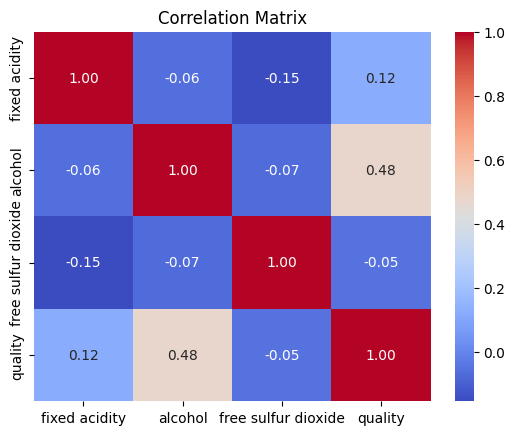

In [15]:
#2.  How fixed acidity correlated to the quality of the wine
# How alcohol content affect the quality
# How free Sulphur dioxide content correlated to the quality of the wine


# correlation of each column with quality
corr_fixedacidity = df['fixed acidity'].corr(df['quality'])
corr_alcohol = df['alcohol'].corr(df['quality'])
corr_freeso2 = df['free sulfur dioxide'].corr(df['quality'])


print("Correlation of fixed acidity with quality:", corr_fixedacidity)
print("Correlation of alcohol with quality:", corr_alcohol)
print("Correlation of free sulfur dioxide with quality:", corr_freeso2)


column = ['fixed acidity', 'alcohol', 'free sulfur dioxide', 'quality']
corr_matrix = df[column].corr()

#correlation matrix
print("Correlation Matrix:\n", corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [18]:
# 3. average residual sugar for the best quality wine and the lowest quality wine in the dataset

best_quality = df['quality'].max()
lowest_quality = df['quality'].min()

avg_best = df[df['quality'] == best_quality]['residual sugar'].mean()
avg_worst = df[df['quality'] == lowest_quality]['residual sugar'].mean()

print(f" Average residual sugar for best quality wine (quality = {best_quality}) : {avg_best:.2f}")
print(f" Average residual sugar for lowest quality wine (quality = {lowest_quality}) : {avg_worst:.2f}")

 Average residual sugar for best quality wine (quality = 8) : 2.58
 Average residual sugar for lowest quality wine (quality = 3) : 2.64


Correlation between volatile acidity and wine quality : -0.39
Correlation Matrix:
                   volatile acidity   quality
volatile acidity          1.000000 -0.390558
quality                  -0.390558  1.000000


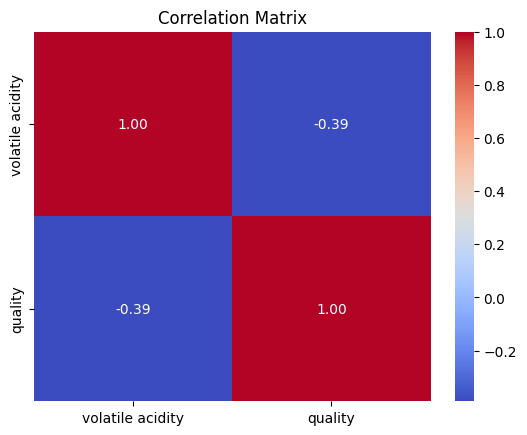

In [21]:
# 4. volatile acidity effect over the quality of the wine samples in the dataset

#correlation between volatile acidity and quality
corr_volatileacidity = df['volatile acidity'].corr(df['quality'])

print(f"Correlation between volatile acidity and wine quality : {corr_volatileacidity:.2f}")

column = ['volatile acidity','quality']
corr_matrix = df[column].corr()

#correlation matrix
print("Correlation Matrix:\n", corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [23]:
# 5.   Decision Tree model and Random Forest Model to predict the Quality of the given samples of wine
# Compare the Accuracy scores for both models

# Features
X = df.drop('quality', axis=1)
y = df['quality']

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree with Gini Index
dt_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dt_gini.fit(X_train, y_train)
y_pred_gini = dt_gini.predict(X_test)
acc_gini = accuracy_score(y_test, y_pred_gini)

# Decision Tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dt_entropy.fit(X_train, y_train)
y_pred_entropy = dt_entropy.predict(X_test)
acc_entropy = accuracy_score(y_test, y_pred_entropy)

# Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

print(f" Accuracy of Decision Tree using Gini index  : {acc_gini:.2f}")
print(f" Accuracy of Decision Tree using Entropy : {acc_entropy:.2f}")
print(f" Accuracy using Random Forest : {acc_rf:.2f}")

 Accuracy of Decision Tree using Gini index  : 0.56
 Accuracy of Decision Tree using Entropy : 0.56
 Accuracy using Random Forest : 0.66
